## Reading in Libraries

## Importing libraries and the data set:
### Following are the libraries we will use 
### 1.numpy
### 2.matplotlib
### 3.pandas
After importing the library,read the dataset using function read_csv().

In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from graphlab import SFrame
df = pd.DataFrame()
sf = SFrame(data=df)
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

This non-commercial license of GraphLab Create for academic use is assigned to fakhre.alam1@gmail.com and will expire on January 28, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1490446691.log


In [2]:
data = pd.read_csv('/home/alam/Downloads/DataNew.csv')

## Data Exploration

In [3]:
data.head()


,Customer_ID,Credit_Amount,Purpose_Credit_Taken,Duration_in_Months,Status_Checking_Accnt,Credit_History,Job_Status,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Age,Housing,Num_Credits,Num_Dependents,Foreign_Worker,Default_On_Payment
0,C15001,3939,P40,11,S11,A34,A172,E73,A93,A101,2,40,A152,2,2,A201,0
1,C15002,1795,P43,18,S12,A34,A172,E75,A92,A103,4,48,A151,2,1,A201,0
2,C15003,6143,P41,48,S11,A34,A172,E75,A92,A101,4,58,A153,2,1,A201,1
3,C15004,2675,P43,22,S14,A32,A173,E75,A93,A101,4,40,A152,1,1,A201,0
4,C15005,12389,P40,36,S12,A32,NaN,E73,A93,A101,4,37,A153,1,1,A201,1


## Look at summary of numerical fields by using describe() function

In [4]:
data.describe()

,Credit_Amount,Duration_in_Months,Current_Address_Yrs,Age,Num_Credits,Num_Dependents,Default_On_Payment
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3271.258000,20.903000,2.845000,35.550800,1.407000,1.155000,0.299000
std,2821.607329,12.053989,1.103276,11.386718,0.577423,0.361941,0.457866
min,250.000000,4.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,1365.500000,12.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,2319.500000,18.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,3972.250000,24.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,18424.000000,72.000000,4.000000,85.000000,4.000000,2.000000,1.000000


In [5]:
data['Credit_History'].value_counts()

A32    2650
A34    1465
A33     440
A31     245
A30     200
Name: Credit_History, dtype: int64

## Feature Scaling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables. Lets plot the distribution of all the continuous variables in  the data set.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a6310a690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0a609cf810>]], dtype=object)

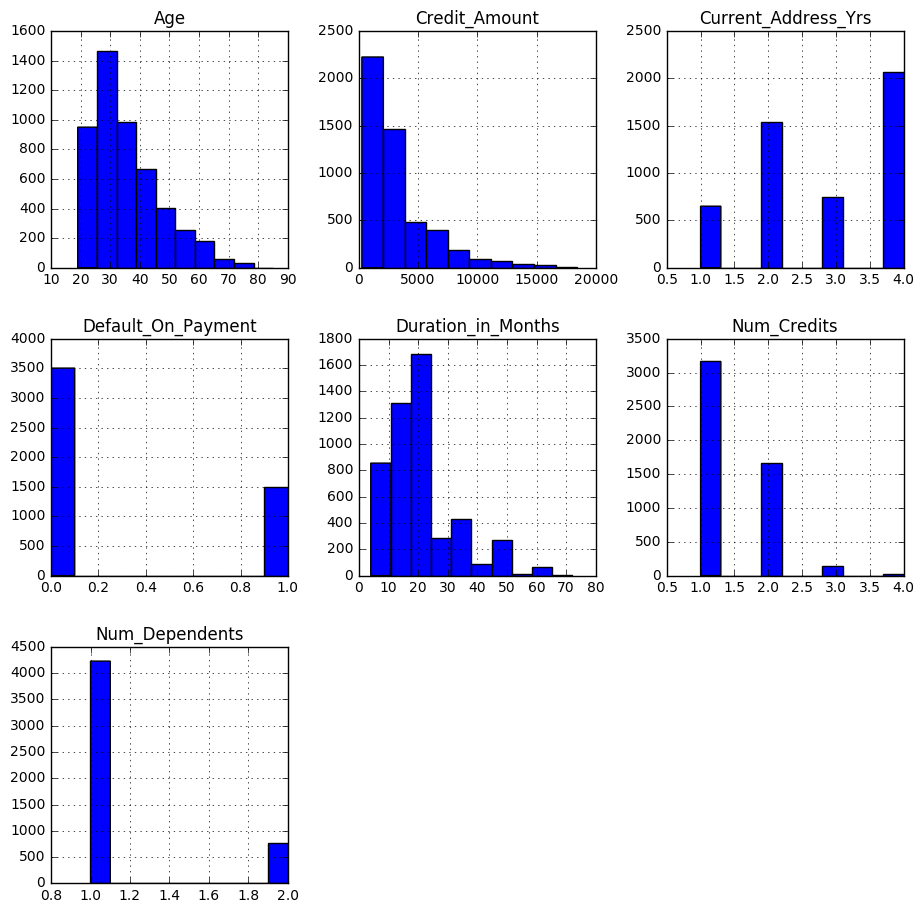

In [6]:
import matplotlib.pyplot as plt
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its 


## Distribution analysis

Plotting the histogram of Credit_Amount using the following commands

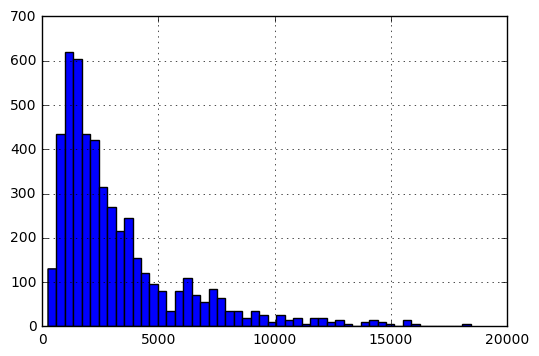

In [7]:
data['Credit_Amount'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

## Boxplot
It Understand the distribution.Box Plot for fare can be plotted by 

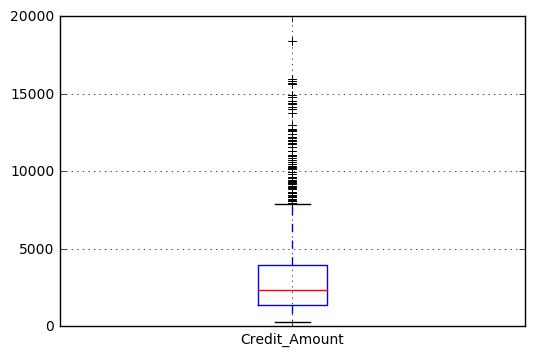

In [8]:
data.boxplot(column='Credit_Amount')

This confirms the presence of a lot of outliers/extreme values

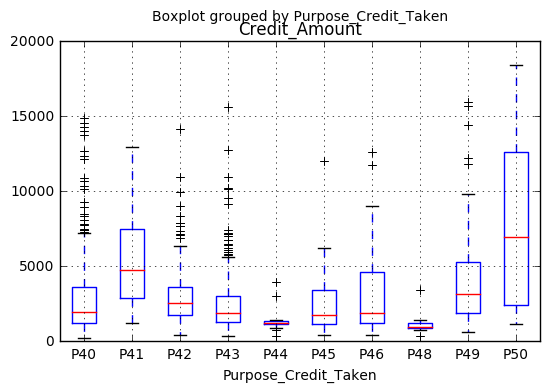

In [9]:
data.boxplot(column='Credit_Amount', by = 'Purpose_Credit_Taken')

We can see that purpose of loan taken of Vehicle(P40) and other(P50)and there are a higher number of loan, which are appearing to be the outliers.



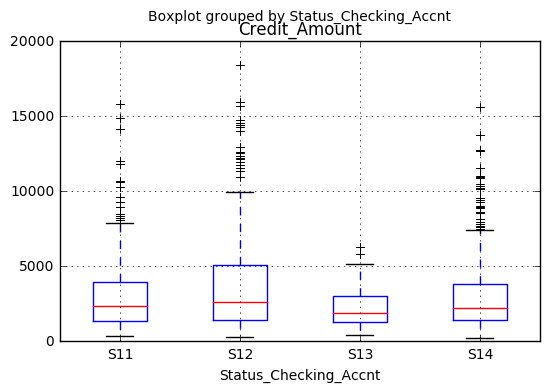

In [10]:
data.boxplot(column='Credit_Amount', by = 'Status_Checking_Accnt')

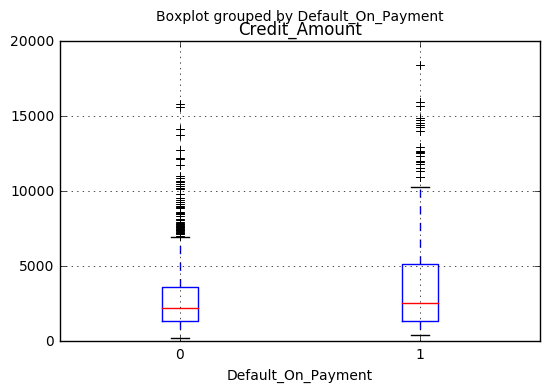

In [11]:
data.boxplot(column='Credit_Amount', by = 'Default_On_Payment')

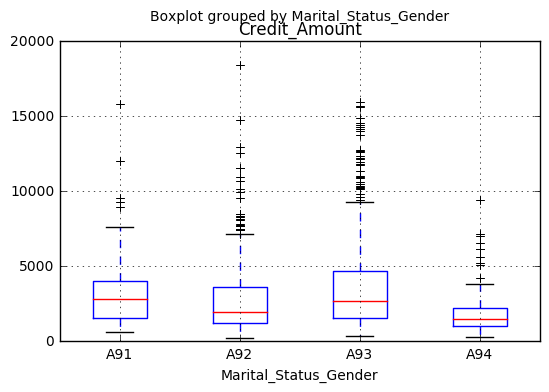

In [12]:

data.boxplot(column='Credit_Amount', by ='Marital_Status_Gender' )##Plot a box plot for variable LoanAmount by variable Marital_Status_Gender of data set


Plot a box plot for variable LoanAmount by variable Marital_Status_Gender of data set.

### Now, Let’s look at the histogram and boxplot of LoanAmount 

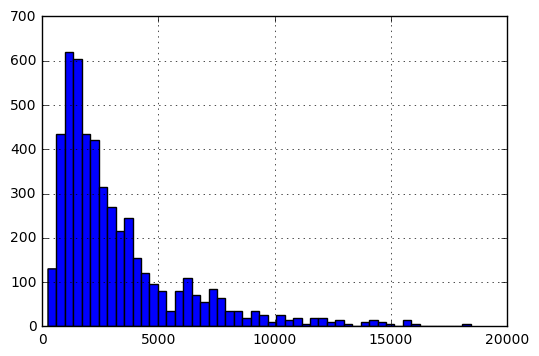

In [13]:
data['Credit_Amount'].hist(bins=50)

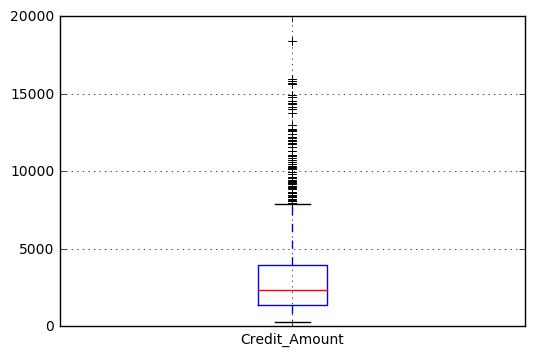

In [14]:
data.boxplot(column='Credit_Amount')

#### there are some extreme values. Clearly,  LoanAmount require some amount of data munging

## Categorical variable analysis

In [15]:
temp1 = data['Credit_History'].value_counts(ascending=True)

In [16]:
temp2 = data.pivot_table(values='Default_On_Payment',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [17]:
print 'Frequency Table for Credit History:' 

Frequency Table for Credit History:


In [18]:
print temp1


A30     200
A31     245
A33     440
A34    1465
A32    2650
Name: Credit_History, dtype: int64


In [19]:
print '\nProbility of getting loan for each Credit History class:' 
print temp2


Probility of getting loan for each Credit History class:
Credit_History
A30   NaN
A31   NaN
A32   NaN
A33   NaN
A34   NaN
Name: Default_On_Payment, dtype: float64


### Importing Matplot Library

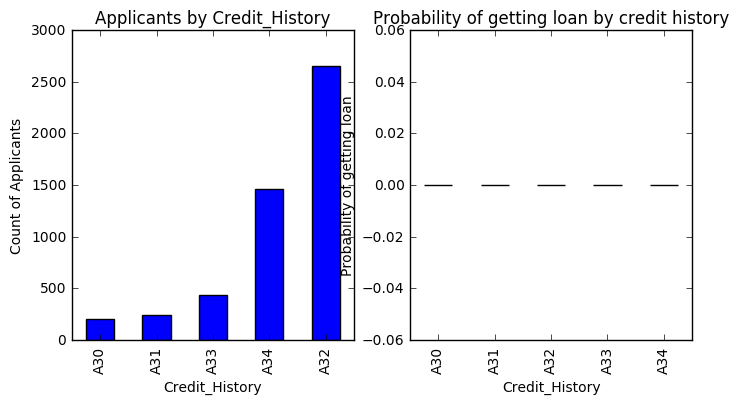

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are zero-fold and Existing loan paid back timely till date(A32).

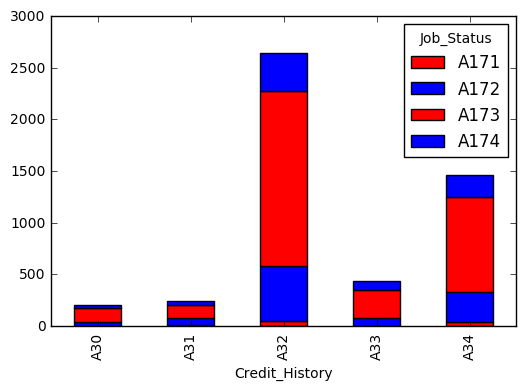

In [21]:
temp3 = pd.crosstab(data['Credit_History'], data['Job_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Here we can see that A171: Unemployed/ Unskilled - non-resident more than they are taking personal loan and delay to pay loan amount and A174: Management/ Self-employed/ Highly Qualified Employee paid loan on timley. 

In [40]:
temp3 = pd.crosstab(data['Credit_History'], data['Marital_Status_Gender'])


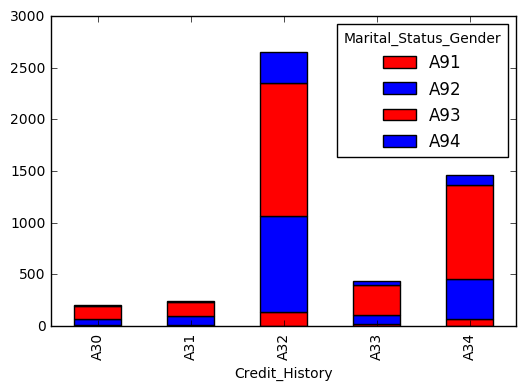

In [23]:
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Data Munging in Python : Using Pandas
While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. Here are the problems, we are already aware of:

1.There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.


2.While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.


## Check missing values in the dataset

Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset

In [24]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Customer_ID                     0
Credit_Amount                   0
Purpose_Credit_Taken            0
Duration_in_Months              0
Status_Checking_Accnt           0
Credit_History                  0
Job_Status                     12
Years_At_Present_Employment     0
Marital_Status_Gender           0
Other_Debtors_Guarantors        0
Current_Address_Yrs             0
Age                             0
Housing                         9
Num_Credits                     0
Num_Dependents                  0
Foreign_Worker                  0
Default_On_Payment              0
dtype: int64

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data. Get a detailed view on different imputation techniques 

## How to fill missing value in Job_status and Housing
There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:

In [25]:
data = data.dropna(subset=["Job_Status","Housing"])

In [26]:
data.isnull().sum()

Customer_ID                    0
Credit_Amount                  0
Purpose_Credit_Taken           0
Duration_in_Months             0
Status_Checking_Accnt          0
Credit_History                 0
Job_Status                     0
Years_At_Present_Employment    0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Age                            0
Housing                        0
Num_Credits                    0
Num_Dependents                 0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

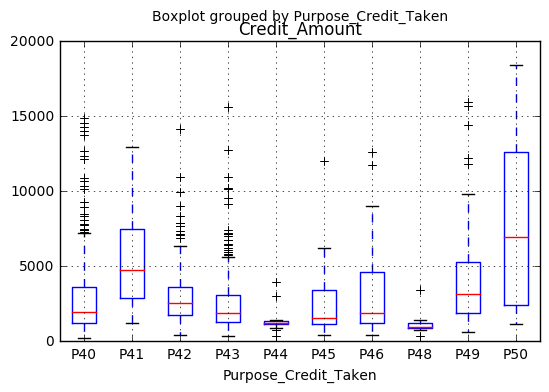

In [29]:
data.boxplot(column='Credit_Amount', by = 'Purpose_Credit_Taken')

Here we can see that there is no more outlier.

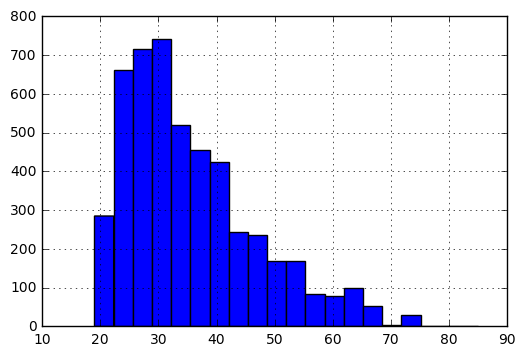

In [30]:
data['Age'].hist(bins=20)

## Building a Predictive Model in Python

After, we have made the data useful for modeling, let’s  create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose. 

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [31]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Credit_Amount','Duration_in_Months','Years_At_Present_Employment','Marital_Status_Gender',
           'Age','Housing','Num_Credits','Num_Dependents']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes

Customer_ID                    object
Credit_Amount                   int64
Purpose_Credit_Taken           object
Duration_in_Months              int64
Status_Checking_Accnt          object
Credit_History                 object
Job_Status                     object
Years_At_Present_Employment     int64
Marital_Status_Gender           int64
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Age                             int64
Housing                         int64
Num_Credits                     int64
Num_Dependents                  int64
Foreign_Worker                 object
Default_On_Payment              int64
dtype: object

we will import the required modules. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [32]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold    #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


/home/alam/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))
        model.fit(data[predictors],data[outcome])


## Logistic Regression

Let’s make our first Logistic Regression model. One way would be to take all the variables into the model but this might result in overfitting . In simple words, taking all variables might result in the model understanding complex relations specific to the data and will not generalize well. .

We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

1.Applicants having a credit history.
2.Applicants with purpose of loan taken.
3.Applicants with higher job status.
4.Properties in Number of existing credits at this bank.
5.So let’s make our first model with ‘Credit_Amount

In [34]:
import numpy as np

import matplotlib as plt

from sklearn import datasets

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [36]:
outcome_var = 'Default_On_Payment'
model = LogisticRegression()
predictor_var = ['Credit_Amount']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 70.060%
Cross-Validation Score : 70.984%
Cross-Validation Score : 70.532%
Cross-Validation Score : 70.850%
Cross-Validation Score : 70.030%
Cross-Validation Score : 70.060%


In [47]:
##print(metrics.classification_report(outcome_var, predictor_var))

In [37]:
outcome_var = 'Default_On_Payment'
model = LogisticRegression()
predictor_var = ['Num_Dependents']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 70.060%
Cross-Validation Score : 70.984%
Cross-Validation Score : 70.532%
Cross-Validation Score : 70.850%
Cross-Validation Score : 70.030%
Cross-Validation Score : 70.060%


In [35]:
#We can try different combination of variables:
predictor_var = ['Credit_Amount','Duration_in_Months','Years_At_Present_Employment','Num_Credits','Num_Dependents']
a=classification_model(model, data,predictor_var,outcome_var)

Accuracy : 71.185%
Cross-Validation Score : 71.586%
Cross-Validation Score : 71.486%
Cross-Validation Score : 71.586%
Cross-Validation Score : 70.708%
Cross-Validation Score : 70.803%


In [36]:
##confusion_matrix(data,predictor_var)

## Decision Tree

Decision tree is another method for making a predictive model. It is known to provide higher accuracy than logistic regression model.


In [37]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_Amount','Marital_Status_Gender','Age','Num_Dependents']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 99.498%
Cross-Validation Score : 99.749%
Cross-Validation Score : 99.833%
Cross-Validation Score : 99.874%
Cross-Validation Score : 99.900%


Accuracy : 100.000% Cross-Validation Score :99.498%

Here the model based on categorical variables is unable to have an impact because Credit Amount is dominating over them. Let’s try a few numerical variables:

In [38]:
#We can try different combination of variables:
predictor_var = ['Credit_Amount','Housing','Num_Credits']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 99.096%
Cross-Validation Score : 98.494%
Cross-Validation Score : 98.494%
Cross-Validation Score : 98.494%
Cross-Validation Score : 98.594%
Cross-Validation Score : 98.534%


Accuracy : 99.096% Cross-Validation Score :98.494%



Above both models are overfitted. Now create some other model which control the overfitting.

In [39]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
predictor_var = ['Credit_Amount','Marital_Status_Gender','Age','Num_Dependents']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 85.723%
Cross-Validation Score : 85.843%
Cross-Validation Score : 84.488%
Cross-Validation Score : 84.170%
Cross-Validation Score : 83.609%
Cross-Validation Score : 83.454%


Accuracy : 85.723% and Cross-Validation Score : 85.843% .(In this model we control Overfitting)

Lets try to  different combination of variables:

In [40]:
predictor_var = ['Credit_Amount','Housing','Num_Credits']   ## Predicted Variable
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 78.233%
Cross-Validation Score : 80.221%
Cross-Validation Score : 78.665%
Cross-Validation Score : 78.815%
Cross-Validation Score : 77.661%
Cross-Validation Score : 77.450%


Accuracy is 78.233% and Cross Validation Score is : 80.221%

## Random Forest

Random forest is another algorithm for solving the classification problem.

An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [41]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_Amount','Marital_Status_Gender','Age','Num_Dependents',
       'Current_Address_Yrs','Duration_in_Months','Years_At_Present_Employment','Housing','Num_Credits']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 100.000%
Cross-Validation Score : 100.000%
Cross-Validation Score : 99.833%
Cross-Validation Score : 99.874%
Cross-Validation Score : 99.900%


Accuracy : 100.000% Cross-Validation Score : 100.000%. This is the ultimate case of overfitting.

Lets create some other model where we reduce accuracy and control the overfitting .



In [42]:
model = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
predictor_var = ['Credit_Amount','Marital_Status_Gender','Age','Num_Dependents',
       'Current_Address_Yrs','Duration_in_Months','Years_At_Present_Employment','Housing','Num_Credits']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 93.715%
Cross-Validation Score : 94.679%
Cross-Validation Score : 93.825%
Cross-Validation Score : 93.876%
Cross-Validation Score : 92.922%
Cross-Validation Score : 92.811%


Here we see that the accuracy is  93.715% and Cross validation is 94.679% for the training set. This  can be resolved in two ways:

1.Reducing the number of predictors

2.Tuning the model parameters
Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [43]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp

Credit_Amount                  0.282449
Age                            0.202571
Duration_in_Months             0.179729
Years_At_Present_Employment    0.082423
Current_Address_Yrs            0.064698
Marital_Status_Gender          0.057926
Housing                        0.055646
Num_Credits                    0.044349
Num_Dependents                 0.030208
dtype: float64


Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

In [44]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_Amount','Num_Dependents','Num_Credits','Housing','Duration_in_Months']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 78.835%
Cross-Validation Score : 78.313%
Cross-Validation Score : 78.213%
Cross-Validation Score : 78.715%
Cross-Validation Score : 77.861%
Cross-Validation Score : 77.771%


##   K-Nearest Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
predictor_var = ['Credit_Amount','Num_Dependents','Num_Credits','Housing']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 80.100%
Cross-Validation Score : 78.112%
Cross-Validation Score : 78.213%
Cross-Validation Score : 78.112%
Cross-Validation Score : 77.610%
Cross-Validation Score : 77.570%


In [46]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=0)
predictor_var = ['Credit_Amount','Num_Dependents','Num_Credits','Housing']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 16.827%
Cross-Validation Score : -198539753.387%
Cross-Validation Score : -198334692.227%
Cross-Validation Score : -196477424.160%
Cross-Validation Score : -195094707.459%
Cross-Validation Score : -195297102.281%


In [434]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix